# Analysis of the "Ford GoBike" Data

## Introduction  

> Ford GoBike, currently "Bay Wheels" is a regional public bicycle sharing system in the San Francisco Bay Area. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations.

In this project, I will performing an exploratory analysis on data provided by Ford GoBike.

## Part I - Data Wrangling  

In this project, we will focus on the record of individual trips taken in from 2017 to April, 2019.  

Ford GoBike Data: https://s3.amazonaws.com/fordgobike-data/index.html

In [1]:
# import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

In [2]:
# download the dataset with pandas
folder_name_of_csvs = 'trip_data_files'

In [3]:
makedirs(folder_name_of_csvs)
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_name_of_csvs))
for month in range(1,12):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
        
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(folder_name_of_csvs)

for month in range(1,4):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2019' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
        
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(folder_name_of_csvs)

In [3]:
# Combine All Locally Saved CSVs into One DataFrame
list_csvs = []
for file_name in listdir(folder_name_of_csvs):
    list_csvs.append(pd.read_csv(folder_name_of_csvs+'/'+file_name))
df = pd.concat(list_csvs)

In [4]:
#saving this combined dataframe to a csv file
df.to_csv('data.csv')

## Part II - Assesment of Data

In [36]:
# Examine DataFrame
df = pd.read_csv('data.csv')

In [37]:
df.sample(5)

,Unnamed: 0,Unnamed: 0.1,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
779559,192869,NaN,306,No,372,50.0,37.780526,-122.390288,2nd St at Townsend St,2018-10-02 09:00:00.8890,1980.0,Male,16.0,37.794130,-122.394430,Steuart St at Market St,2018-10-02 08:53:48.6450,Subscriber
182004,182004,NaN,2432,No,723,263.0,37.862827,-122.290231,Channing Way at San Pablo Ave,2018-07-04 08:32:53.6690,1996.0,Male,253.0,37.866418,-122.253799,Haste St at College Ave,2018-07-04 08:20:49.9490,Subscriber
172687,172687,NaN,2752,No,552,349.0,37.781010,-122.405666,Howard St at Mary St,2018-07-05 19:45:30.3970,1979.0,Male,17.0,37.792251,-122.397086,Embarcadero BART Station (Beale St at Market St),2018-07-05 19:36:17.6060,Subscriber
3026255,89510,NaN,4419,No,445,58.0,37.776619,-122.417385,Market St at 10th St,2018-09-17 11:18:46.0950,1977.0,Male,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2018-09-17 11:11:20.7120,Subscriber
227418,28196,NaN,5665,No,842,315.0,37.834174,-122.272968,Market St at 45th St,2019-03-28 15:47:08.0610,1966.0,Male,265.0,37.858868,-122.291209,Ninth St at Parker St,2019-03-28 15:33:05.2620,Subscriber


In [38]:
#duplicate check
df.duplicated().sum()

0

In [39]:
#to get a general feel for the data
df.describe().round(decimals = 3)

,Unnamed: 0,Unnamed: 0.1,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,3122962.000,519700.000,3122962.000,3122962.000,3110653.000,3122962.000,3122962.000,2909807.000,3110653.000,3122962.000,3122962.000
mean,120691.548,259849.500,2710.282,878.682,118.739,37.769,-122.352,1983.113,120.445,37.769,-122.353
std,102631.872,150024.612,1722.985,2494.130,102.619,0.135,0.328,10.435,102.699,0.103,0.161
min,0.000,0.000,10.000,61.000,3.000,0.000,-122.474,1878.000,3.000,0.000,-122.474
25%,48796.000,129924.750,1322.000,352.000,30.000,37.771,-122.411,1978.000,31.000,37.771,-122.412
50%,97778.000,259849.500,2559.000,558.000,86.000,37.781,-122.397,1985.000,88.000,37.781,-122.398
75%,160364.750,389774.250,3782.000,875.000,185.000,37.796,-122.295,1991.000,186.000,37.795,-122.293
max,519699.000,519699.000,7108.000,86369.000,420.000,45.510,0.000,2001.000,420.000,45.510,0.000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122962 entries, 0 to 3122961
Data columns (total 18 columns):
Unnamed: 0                 int64
Unnamed: 0.1               float64
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(8), int64(3), object(7)
memory usage: 428.9+ MB


>Issues
- 2 unamed columns
- start time and end time are not timestamps
- bike id, start_station_id, end_station_id can be set to object type
- birth years having dates less than 1900
- there is a need for ride distance column
- user type, gender and bike_share_for_all_trip can be set to category

## Part III - Cleaning

In [41]:
# Create copies of original DataFrames
df_copy = df.copy()

### Setting appropriate data types

In [42]:
#settings the time related flields to datetime data_type
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
#setting objects to categorical data_type
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')
#setting names to string data_type
df.bike_id = df.bike_id.astype(str)
df.start_station_id = df.bike_id.astype(str)
df.end_station_id = df.bike_id.astype(str)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122962 entries, 0 to 3122961
Data columns (total 18 columns):
Unnamed: 0                 int64
Unnamed: 0.1               float64
bike_id                    object
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
dtypes: category(3), datetime64[ns](2), float64(6), int64(2), object(5)
memory usage: 366.3+ MB


### Dropping unnecessary columns

In [44]:
#dropping the columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

### Generation of Age Column

In [45]:
#Filter data to include reasonable member age range
df['member_age'] = 2019-df['member_birth_year']

### Enhancing the current data table with date related fields

In [46]:
#s_ prefix would be used for start time and e_ shall be used for end time values
#extracting date
df['s_date']=df['start_time'].dt.date
df['e_date']=df['end_time'].dt.date
#extracting year
df['s_year']=df['start_time'].dt.year.astype(int)
df['e_year']=df['end_time'].dt.year.astype(int)
#extracting month
df['s_month']=df['start_time'].dt.month.astype(int)
df['e_month']=df['end_time'].dt.month.astype(int)
#extracting hour
df['s_hour']=df['start_time'].dt.hour
df['e_hour']=df['end_time'].dt.hour
#extracting weekday
df['s_weekday']=df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df['e_weekday']=df['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [47]:
#dropping start_time and end_time data since we have extracted the required data from them
df.drop(['start_time', 'end_time'], axis = 1, inplace = True)

In [48]:
df.columns

Index(['bike_id', 'bike_share_for_all_trip', 'duration_sec', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'end_station_name',
       'member_birth_year', 'member_gender', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'user_type', 'member_age', 's_date', 'e_date',
       's_year', 'e_year', 's_month', 'e_month', 's_hour', 'e_hour',
       's_weekday', 'e_weekday'],
      dtype='object')

In [49]:
df.shape

(3122962, 25)

### What is the structure of your dataset?

> There are 3122962 rides in the dataset with 25 features. Most variables are numeric in the dataset.

### What is/are the main feature(s) of interest in your dataset?

> We will focus on users' behaviors and personal details like;  
  Average riding duration  
  Average riding distance  
  Age groups of users  
  Genders  
  Weekly day distrubition

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the member_age feature to play a major role

In [19]:
# Saving the modified data into csv for the slide
df.to_csv('ppt_data.csv')

## Part IV - Univariate Exploration

Now, we will try and explore the usage data for the bike rental service. I will plot the graphs to understand the patterns in usage on monthly, weekday and hourly basis. I will also try and see the average duration of these bike trips and explore the member ages to check for any discrepancies.

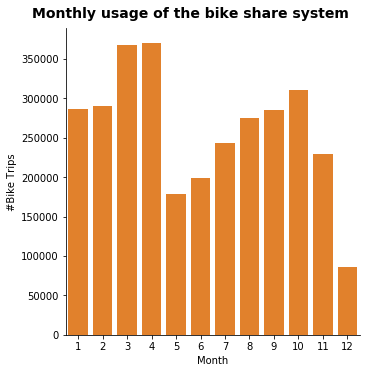

In [50]:
# monthly usage of the bike sharing system
basic = sns.color_palette()[1]
p1 = sns.catplot(data=df, x='s_month', kind='count', color = basic)
p1.set_axis_labels("Month", "#Bike Trips")
p1.fig.suptitle('Monthly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');
p1.savefig('image01.png');

During winter months, we can see that there is decrease in bike rides

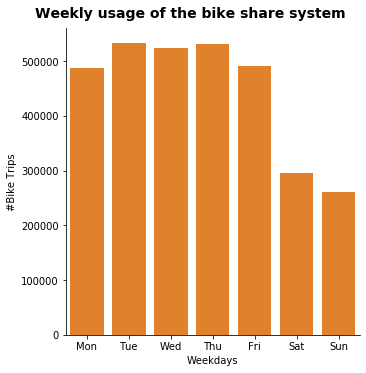

In [51]:
# weekday usage of the bike sharing system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
p2 = sns.catplot(data=df, x='s_weekday', kind='count', color = basic, order = weekday)
p2.set_axis_labels("Weekdays", "#Bike Trips")
p2.fig.suptitle('Weekly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');
p2.savefig('image02.png');

It is observed that there is maximum usage on weekdays

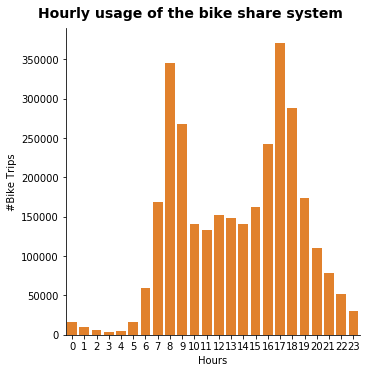

In [52]:
# hourly usage of the bike sharing system
p3 = sns.catplot(data=df, x='s_hour', kind='count', color = basic)
p3.set_axis_labels("Hours", "#Bike Trips")
p3.fig.suptitle('Hourly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');
p3.savefig('image03.png');

The hourly distribution is bimodal, the system is used mainly around 8-9am and 5-6pm

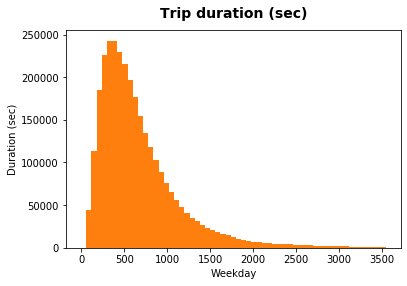

In [53]:
# trip duration in seconds per user
bin_edges = np.arange(0, 3600, 60)
plt.hist(data = df, x = 'duration_sec', bins = bin_edges, color = basic)
plt.title("Trip duration (sec)", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Duration (sec)');
plt.savefig('image04.png');

I will try to analyse the spread of age data using a box plot. It will help in clearly seeing the outliers present in our dataset

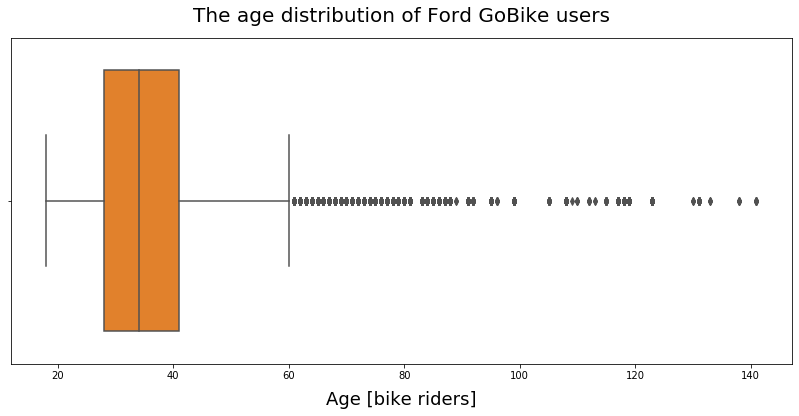

In [54]:
plt.figure(figsize=(14,6))
sns.boxplot(x='member_age', data=df, color = basic, orient='h')
plt.title("The age distribution of Ford GoBike users", fontsize=20, y=1.03)
plt.xlabel("Age [bike riders]", fontsize=18, labelpad=10)
plt.savefig('image05.png');

In [55]:
df.member_age.describe(percentiles = [ .95]).round(decimals = 2)

count    2909807.00
mean          35.89
std           10.43
min           18.00
50%           34.00
95%           56.00
max          141.00
Name: member_age, dtype: float64

In [56]:
#Keeping age below 56 since 95% of the users lie in that range
df = df[df['member_age']<=56]

In [57]:
df.member_age = df.member_age.astype(int)
df.drop(['member_birth_year'], axis=1, inplace=True)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> During winter months, there is decrease in bike rides. The bikes are used mostly on weekdays and around 8-9 am and 5-6 pm. If we consider the duration of trips, its unusual that some of the trips stretch upto 50 hours.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was one unusal distribution for the member birth year, which in some cases was dated before 1900 and customers having age of 141. This surely should be an entry error. Since 95% of the members are between 17 and 56 years, I removed users older than 56.

## Part V - Bivariate Exploration


I will add in the user_type and see if the usage varies based on the type of user

### Percentage of bike rides of subscribers vs customers

In [58]:
count_of_rides_per_user_type = df.groupby('user_type').size().reset_index(name='count')

In [59]:
count_of_rides_per_user_type['count']/len(df)*100

0    11.648905
1    88.351095
Name: count, dtype: float64

Percentage of subscribers is almost 88.35%  
Percentage of customers is almost 11.64%

### User trends of bike rides of subscribers vs customers

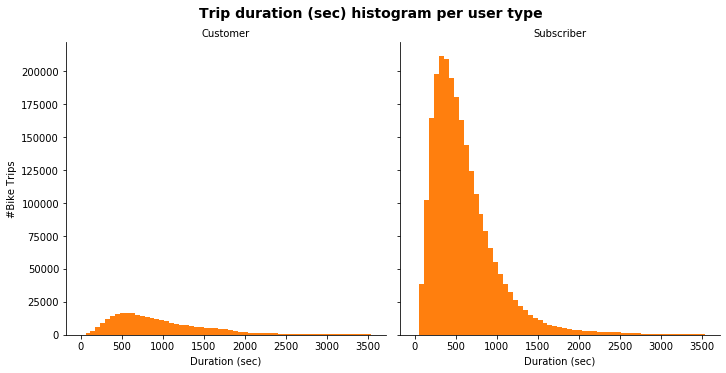

In [60]:
# trip duration in seconds per usertype
g = sns.FacetGrid(df, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=basic, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');
g.savefig('image05.png');

Subscribers' average trip duration is around 6 minutes.  
Customers' average trip duration is around 26 minutes.  

#### broad view of bike ride durations where I have excluded outliers to get a feel for the distribution above

<Figure size 720x720 with 0 Axes>

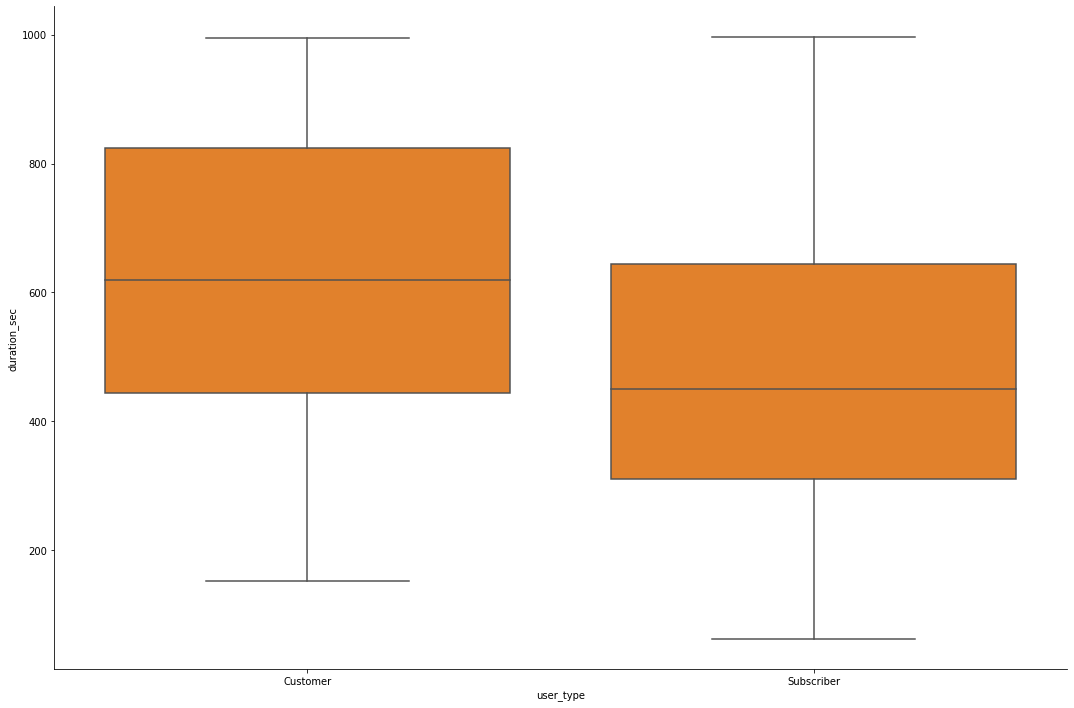

<Figure size 432x288 with 0 Axes>

In [61]:
#code to chart the comparision using boxplots
np.random.seed(2018)
samples = np.random.choice(df.shape[0], 2000, replace = False)
bike_data_samp = df.reindex(samples)
bike_data_samp=bike_data_samp[bike_data_samp['duration_sec']<1000]

def boxgrid(x, y, **kwargs):
    sns.boxplot(x, y, color = basic)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = bike_data_samp, y_vars = 'duration_sec', x_vars = 'user_type',
                size = 10, aspect = 1.5)
plt.xlim(0, 1000)
g.map(boxgrid)
plt.show();
plt.savefig('image06.png');

Customers seem to avail longer bike rides

### Average trip duration of subscribers vs customers

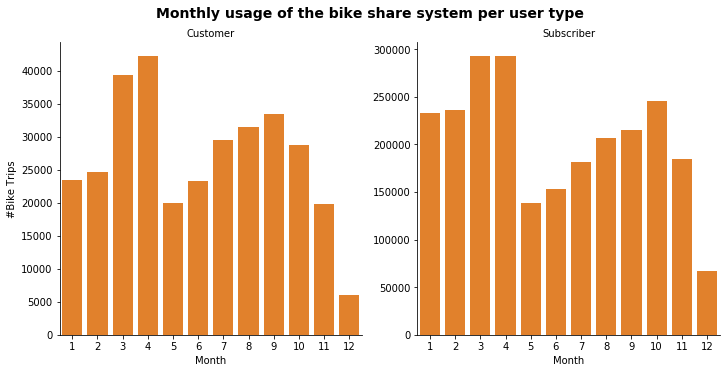

In [62]:
# monthly usage of the bike sharing system per user type
g = sns.catplot(data=df, x='s_month', col="user_type", kind='count', sharey = False, 
                color = basic)
g.set_axis_labels("Month", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');
g.savefig('image07.png');

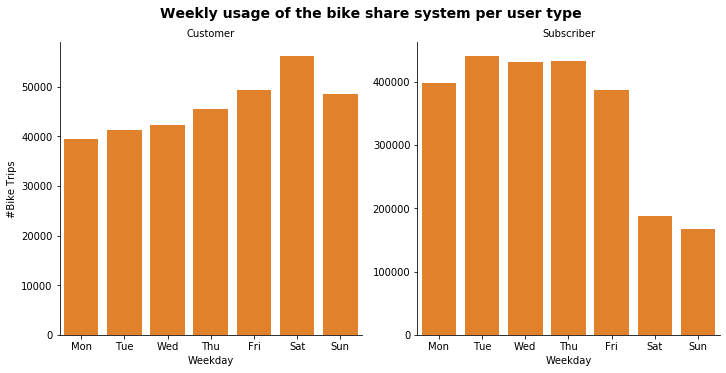

In [63]:
# weekday usage of the bike sharing system per user type
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df, x='s_weekday', col="user_type", kind='count', sharey = False,
            color = basic, order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');
g.savefig('image08.png');

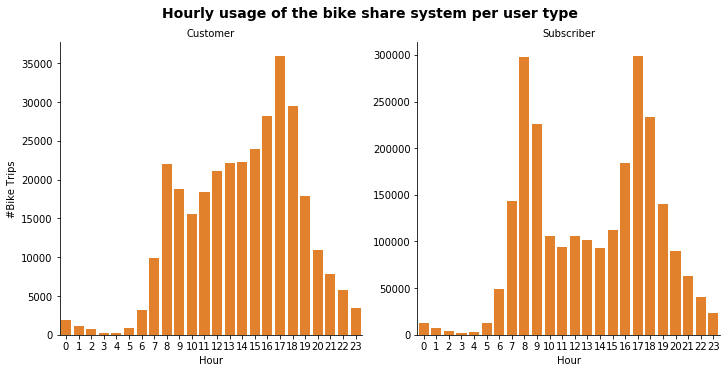

In [64]:
# hourly usage of the bike sharing system per user type
g = sns.catplot(data=df, x='s_hour', col="user_type", kind='count', sharey = False,
            color = basic)
g.set_axis_labels("Hour", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');
g.savefig('image09.png');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We can say that in the univariate exploration, the number of subscribers who used bikes were more than customers. However, in the bivariate exploration, the avearge time spent by customers were more than subscribers Another interesting feature, is the duration (in min) spent on the bike gradually reduces over the months

>Adding user type in the mix showed different usage patterns between the two types of users. I believe the customers are users that rent the bike when absoutely necessary, as tourists or for leisure purpose whereas subscribers mostly use this service for their daily commute which should generally be a short distance and therefore less lengthy. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Duration of trip varies based on the type of user

## Multivariate Exploration


Lets bring in the gender for analysis!

In [65]:
# we will take a new color theme for this one
basic2 = sns.color_palette()[3]

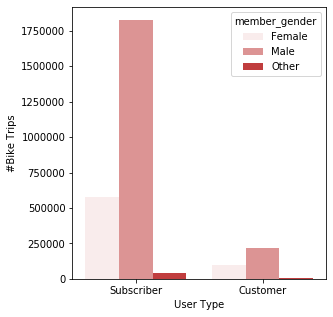

In [66]:
#segregation of user trips based on gender
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
g = sns.countplot(data=df, x="user_type", hue="member_gender", order=df.user_type.value_counts().index, color = basic2)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips');
plt.savefig('image10.png');

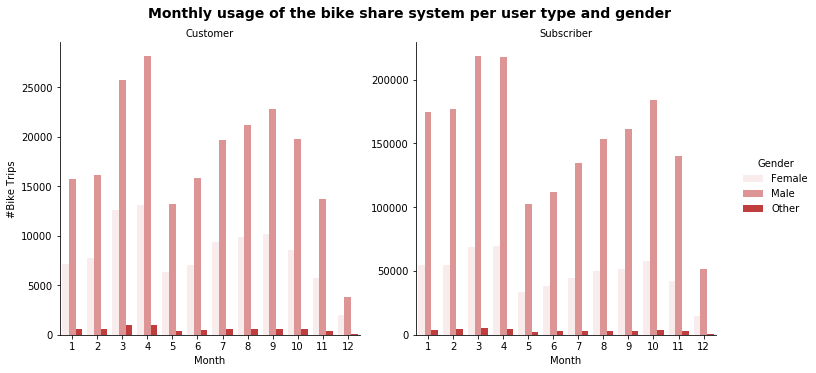

In [67]:
# monthly usage of the bike sharing system per user type and gender
g = sns.catplot(data=df, x='s_month', col="user_type", hue="member_gender", kind='count', 
                sharey = False, color = basic2)
g.set_axis_labels("Month", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');
g.savefig('image11.png');

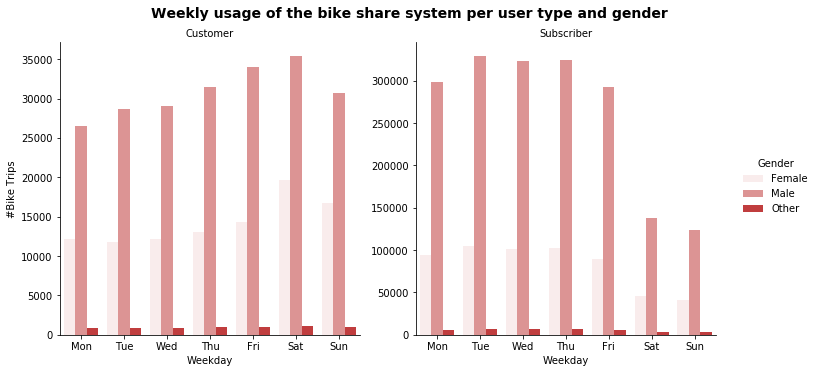

In [68]:
#weekday usage of the bike sharing system per user type and gender
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df, x='s_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday, color = basic2)
g.set_axis_labels("Weekday", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');
g.savefig('image12.png');

<Figure size 1080x720 with 0 Axes>

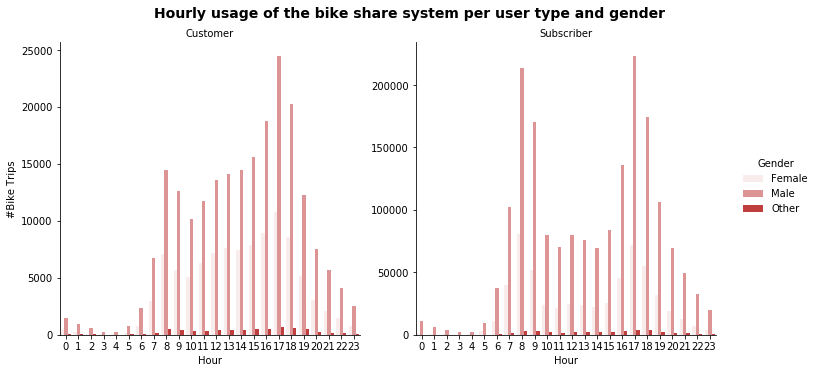

In [69]:
# hourly usage of the bike sharing system per user type and gender
plt.figure(figsize = [15, 10])
g = sns.catplot(data=df, x='s_hour', col="user_type", hue='member_gender', kind='count', sharey = False, color = basic2)
g.set_axis_labels("Hour", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');
g.savefig('image13.png');

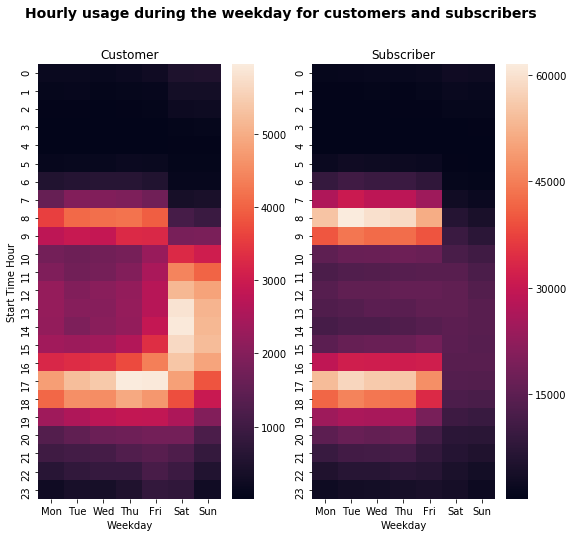

In [70]:
# Setting the weekday order
df['s_weekday'] = pd.Categorical(df['s_weekday'], 
                                 categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                 ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df.query('user_type == "Customer"').groupby(["s_hour", "s_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("s_hour", "s_weekday", "bike_id")
sns.heatmap(df_customer)

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df.query('user_type == "Subscriber"').groupby(["s_hour", "s_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("s_hour", "s_weekday", "bike_id")
sns.heatmap(df_subscriber)

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');
plt.savefig('image14.png');

## Conclusion

> Plotting a heatmap of when bikes are high in demand throughout the day on each weekday shed a new light on the customers behaviour. People use this service on weekdays more than weekends and 8am to 5pm are the peak hours. 

>Percentage of subscribers is almost 88.35% and customers is almost 11.65%. Subscribers' average trip duration is around 6 minutes. Customers' average trip duration is around 26 minutes. 90% of bike rides take place on weekday.
The peak bike rides time for all members is around commute time.

In [71]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Exploration_Ford_GoBike.ipynb'])

1